In [226]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Data preprocessing and Analysis

import titanic data 

In [227]:
train = pd.read_csv("titanic_data/train.csv")
test = pd.read_csv("titanic_data/test.csv")


#show 5 instances of our data
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


join training and test data

In [228]:
train['is_train'] = 1
test['is_train'] = 0

df = pd.concat([train, test], sort=False)
print(f"(number of rows are {df.shape[0]} ,number of columns <features> are {df.shape[1]})")
df.head()


(number of rows are 1309 ,number of columns <features> are 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [229]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"number of missing values in {col} is : {missing}")

number of missing values in PassengerId is : 0
number of missing values in Survived is : 418
number of missing values in Pclass is : 0
number of missing values in Name is : 0
number of missing values in Sex is : 0
number of missing values in Age is : 263
number of missing values in SibSp is : 0
number of missing values in Parch is : 0
number of missing values in Ticket is : 0
number of missing values in Fare is : 1
number of missing values in Cabin is : 1014
number of missing values in Embarked is : 2
number of missing values in is_train is : 0


we replace **age missing values** with **median** and **embarked missing** with **mode** and **drop cabin** duo to more then 60% of the data missed

In [230]:
df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0],
    'Fare': df['Fare'].mode()[0]
}, inplace=True)
df.drop('Cabin', axis=1, inplace=True)  # Many missing values

In [231]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(f"number of missing values in {col} is : {missing}")
print(f"(number of rows are {df.shape[0]} ,number of columns <features> are {df.shape[1]})")

number of missing values in PassengerId is : 0
number of missing values in Survived is : 418
number of missing values in Pclass is : 0
number of missing values in Name is : 0
number of missing values in Sex is : 0
number of missing values in Age is : 0
number of missing values in SibSp is : 0
number of missing values in Parch is : 0
number of missing values in Ticket is : 0
number of missing values in Fare is : 0
number of missing values in Embarked is : 0
number of missing values in is_train is : 0
(number of rows are 1309 ,number of columns <features> are 12)


**feature encoding**

In [232]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)


df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)
df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)

df.drop(columns=['Embarked'], inplace=True)



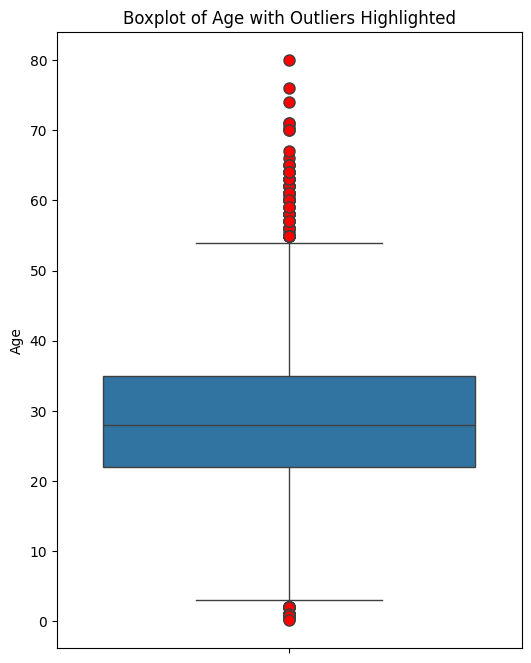

In [233]:
plt.figure(figsize=(6,8))
sns.boxplot(y=df['Age'], flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))
plt.title("Boxplot of Age with Outliers Highlighted")
plt.ylabel("Age")
plt.show()

In [234]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")

num_too_elderly = (df['Age'] > upper_bound).sum()
num_too_young = (df['Age'] < lower_bound).sum()
num_outliers = num_too_elderly+num_too_young
print(f"Number of Age outliers: {num_outliers}")
print(f"percentage of Age outliers: {round(num_outliers*100/df.shape[0])}%")

Lower bound = 2.5
Upper bound = 54.5
Number of Age outliers: 101
percentage of Age outliers: 8%


replace outliers with **nearest bound**

In [235]:
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)

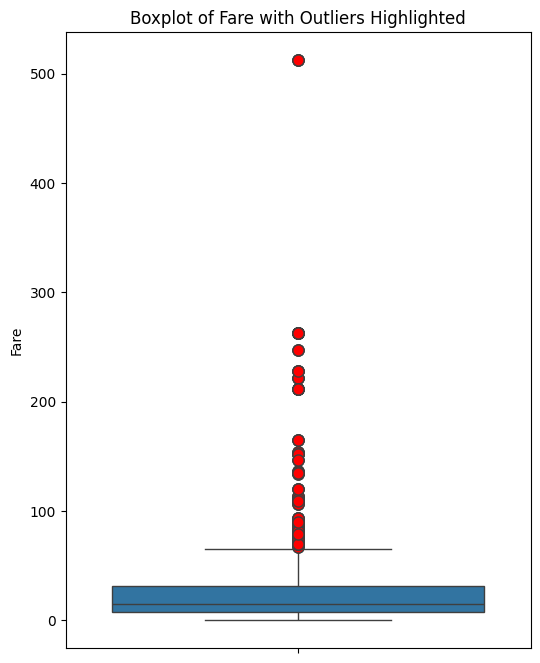

In [236]:
plt.figure(figsize=(6,8))
sns.boxplot(y=df['Fare'], flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))
plt.title("Boxplot of Fare with Outliers Highlighted")
plt.ylabel("Fare")
plt.show()

In [237]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")

num_too_elderly = (df['Fare'] > upper_bound).sum()
num_too_young = (df['Fare'] < lower_bound).sum()
num_outliers = num_too_elderly+num_too_young
print(f"Number of Fare outliers: {num_outliers}")
print(f"percentFare of Fare outliers: {round(num_outliers*100/df.shape[0])}%")

Lower bound = -27.172999999999995
Upper bound = 66.34379999999999
Number of Fare outliers: 171
percentFare of Fare outliers: 13%


In [238]:
df['Fare'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)

In [239]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")

num_too_elderly = (df['Fare'] > upper_bound).sum()
num_too_young = (df['Fare'] < lower_bound).sum()
num_outliers = num_too_elderly+num_too_young
print(f"Number of Fare outliers: {num_outliers}")
print(f"percentFare of Fare outliers: {round(num_outliers*100/df.shape[0])}%")

Lower bound = -27.172999999999995
Upper bound = 66.34379999999999
Number of Fare outliers: 0
percentFare of Fare outliers: 0%


In [240]:
scaler = MinMaxScaler(feature_range=(0, 1))

df['Age'] = scaler.fit_transform(df[['Age']])


# Feature engeneering

In [241]:
from sklearn.feature_selection import VarianceThreshold

drop irrelivant features

In [242]:
irrelevant_features = ["Name","Ticket"]
df.drop(irrelevant_features, axis=1, inplace=True)

drop features whose variance is less then 0.2

In [243]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_train,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,0.375000,1,0,7.2500,1,0,0,1
1,2,1.0,1,0.682692,1,0,66.3438,1,1,0,0
2,3,1.0,3,0.451923,0,0,7.9250,1,0,0,1
3,4,1.0,1,0.625000,1,0,53.1000,1,0,0,1
4,5,0.0,3,0.625000,0,0,8.0500,1,0,0,1


In [244]:
print("vairance of features :")
print(numeric_cols.var())

vairance of features :
PassengerId    142899.166667
Survived            0.236772
Pclass              0.701969
Age                 0.053009
SibSp               1.085052
Parch               0.749195
Fare              432.330520
is_train            0.217524
Embarked_C          0.163845
Embarked_Q          0.085201
Embarked_S          0.210252
dtype: float64


In [245]:
selector = VarianceThreshold(threshold=0.1)
X_new_array = selector.fit_transform(numeric_cols)


# Keep column names
X_new = pd.DataFrame(X_new_array, columns=numeric_cols.columns[selector.get_support()])

print("Features kept:", X_new.columns.tolist())


Features kept: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'is_train', 'Embarked_C', 'Embarked_S']


we use **correlation** to check duplicate column

In [246]:
# numeric_cols = numeric features of train
corr_matrix = numeric_cols.corr()
threshold = 0.5

# Loop over upper triangle of matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            print(f"{col1} vs {col2} = {abs(corr_value):.2f}")




PassengerId vs is_train = 0.81
Pclass vs Fare = 0.73
Embarked_C vs Embarked_S = 0.78


since we have strong correlation between fare and pclass we have to drop one of them
we drop Pclass → keep Fare (continuous gives more info)

In [247]:
df.drop(["Pclass"],axis=1,inplace=True)

In [248]:
print(f"(number of rows are {df.shape[0]} ,number of columns <features> are {df.shape[1]})")
print(df.columns)

(number of rows are 1309 ,number of columns <features> are 11)
Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'is_train',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='str')


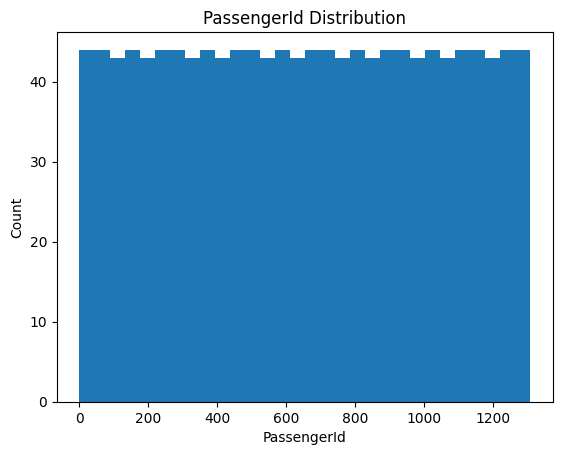

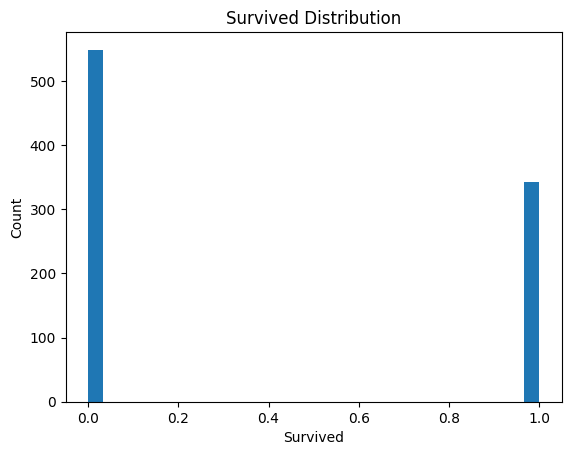

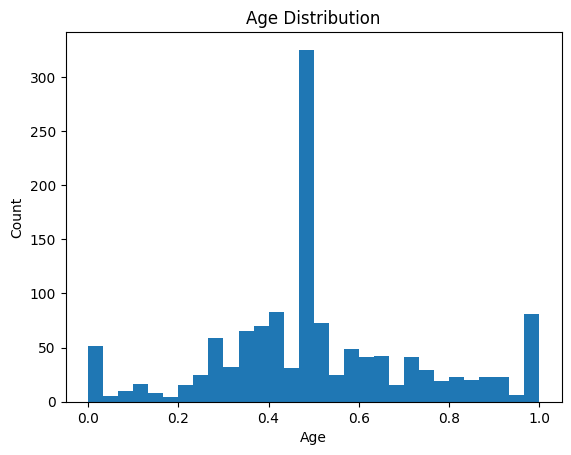

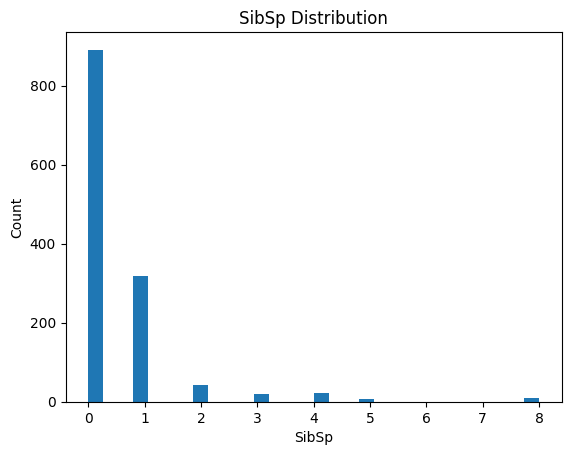

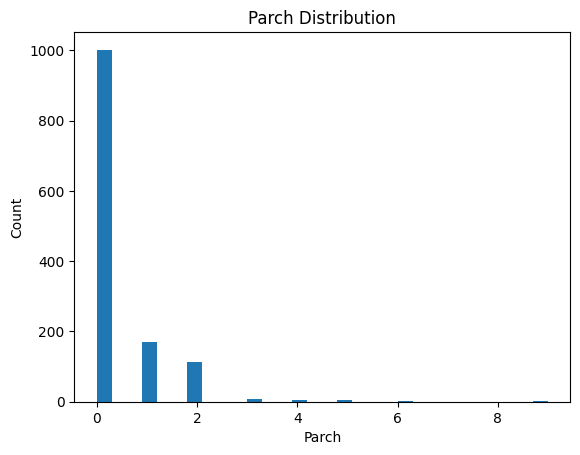

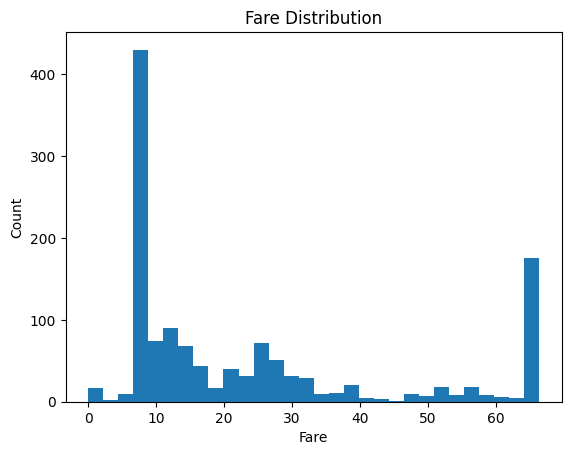

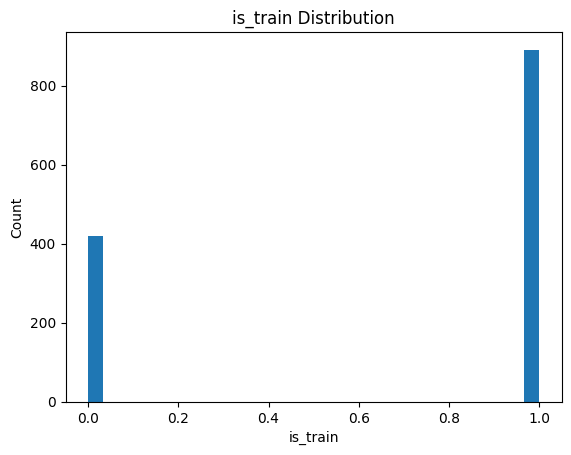

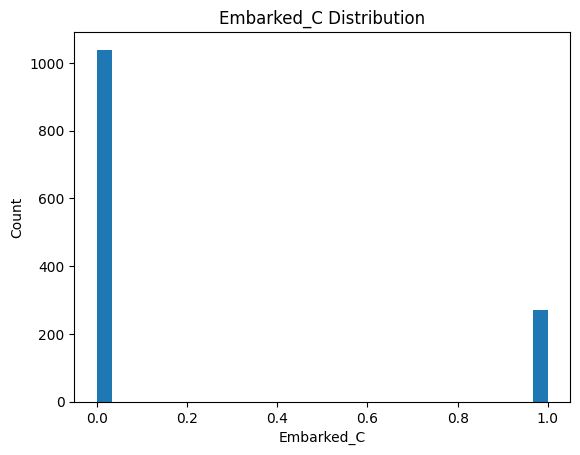

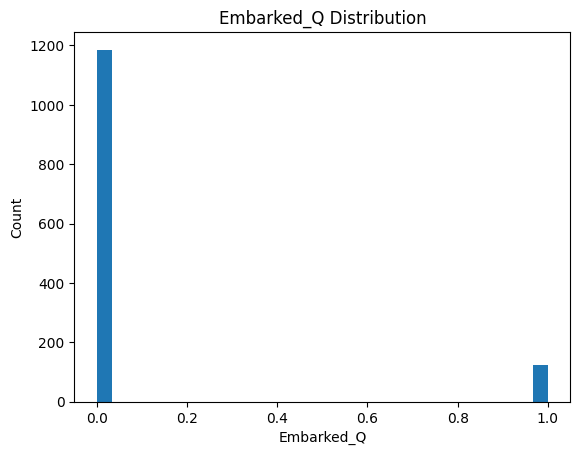

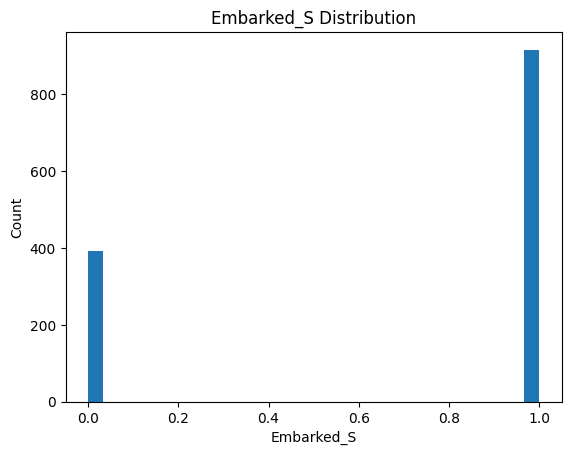

In [249]:
for col in numeric_cols.columns:
    if col == "Pclass": continue
    plt.hist(df[f'{col}'], bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.show()

**sibsp parch and Fare** are right skewed

SibSp: skew before = 3.84, skew after = 1.64
Parch: skew before = 3.67, skew after = 1.79
Fare: skew before = 1.09, skew after = -0.10


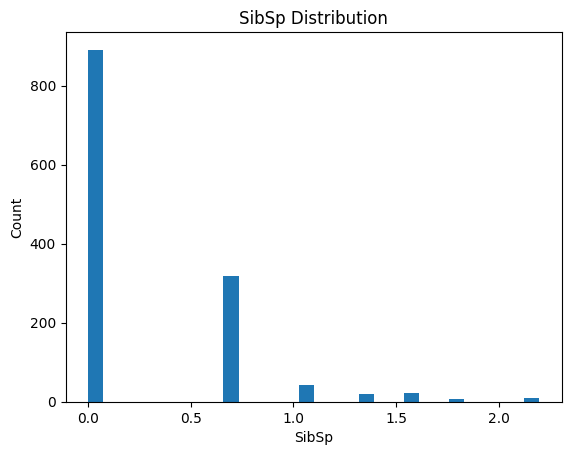

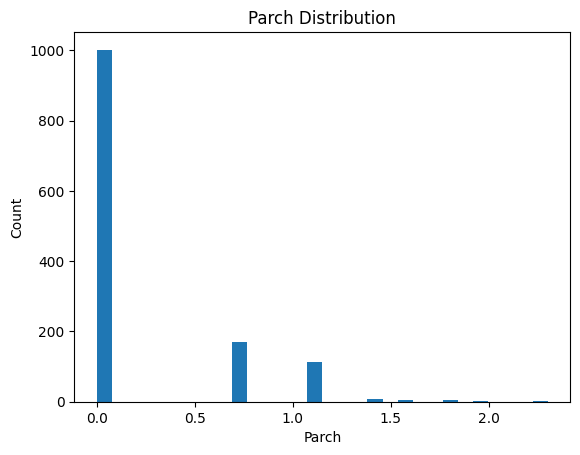

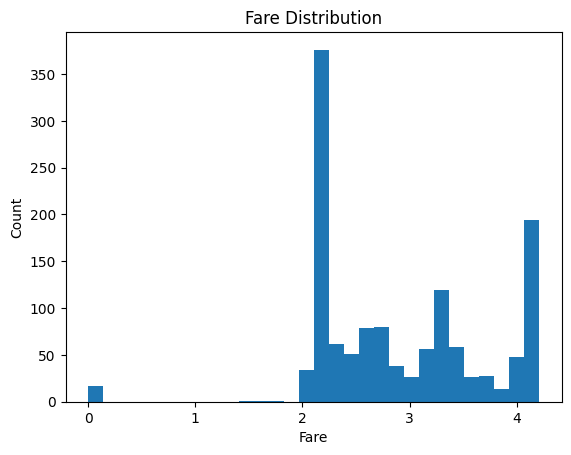

In [250]:
skewed_features = ["SibSp","Parch","Fare"]
for feat in skewed_features:
    before = df[feat].skew()
    df[feat] = np.log1p(df[feat])  # log-transform
    after = df[feat].skew()
    print(f"{feat}: skew before = {before:.2f}, skew after = {after:.2f}")

for feat in skewed_features:
    plt.hist(df[f'{feat}'], bins=30)
    plt.title(f'{feat} Distribution')
    plt.xlabel(f'{feat}')
    plt.ylabel('Count')
    plt.show()

In [251]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,is_train,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,0.375000,0.693147,0.0,2.110213,1,True,0,0,1
1,2,1.0,0.682692,0.693147,0.0,4.209811,1,False,1,0,0
2,3,1.0,0.451923,0.000000,0.0,2.188856,1,False,0,0,1
3,4,1.0,0.625000,0.693147,0.0,3.990834,1,False,0,0,1
4,5,0.0,0.625000,0.000000,0.0,2.202765,1,True,0,0,1


# Logistic regression

since our target is Binary we choose logistic regression model to predict

split back

In [252]:
train_processed = df[df['is_train']==1].drop(columns=['is_train'])
test_processed = df[df['is_train']==0].drop(columns=['is_train', 'Survived'], errors='ignore')
test_processed = test_processed.drop(columns=['PassengerId'])

In [253]:
y = train_processed['Survived']

X = train_processed.drop(columns=['PassengerId', 'Survived'])


In [254]:
pd.DataFrame(X).head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.375000,0.693147,0.0,2.110213,True,0,0,1
1,0.682692,0.693147,0.0,4.209811,False,1,0,0
2,0.451923,0.000000,0.0,2.188856,False,0,0,1
3,0.625000,0.693147,0.0,3.990834,False,0,0,1
4,0.625000,0.000000,0.0,2.202765,True,0,0,1


In [255]:
pd.DataFrame(y).head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [256]:
model = LogisticRegression(max_iter=500)
model.fit(X, y)

# Coefficients (weights)
print(model.coef_)  

# Intercept (bias)
print(model.intercept_) 

[[-1.34735754 -1.03408866 -0.5250677   1.14075196 -2.49064583  0.24495628
  -0.0391572  -0.19092839]]
[-1.13613034]


training accuracy

In [257]:
train_accuracy = model.score(X, y)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.79


In [258]:
y_pred = model.predict(test_processed)

print(y_pred)
print(len(y_pred))

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.

In [259]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission['Survived'] = submission['Survived'].astype(int)

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [260]:
submission.to_csv('titanic_submission.csv', index=False)

In [261]:
print(df.shape[0])
df.head()

1309


,PassengerId,Survived,Age,SibSp,Parch,Fare,is_train,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,0.375000,0.693147,0.0,2.110213,1,True,0,0,1
1,2,1.0,0.682692,0.693147,0.0,4.209811,1,False,1,0,0
2,3,1.0,0.451923,0.000000,0.0,2.188856,1,False,0,0,1
3,4,1.0,0.625000,0.693147,0.0,3.990834,1,False,0,0,1
4,5,0.0,0.625000,0.000000,0.0,2.202765,1,True,0,0,1


# Using decision tree model to predict 

In [262]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [263]:
param_grid = {
    "max_depth": range(1, 21)
}

dt = DecisionTreeClassifier(criterion="entropy", random_state=42)

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X, y)

print("Best max_depth:", grid.best_params_["max_depth"])
print("Best accuracy:", grid.best_score_)


Best max_depth: 7
Best accuracy: 0.8181658401858012


In [264]:
dtree = grid.best_estimator_
dtree.fit(X, y)

# training accuracy
accuracy = dtree.score(X, y)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8698092031425365


In [265]:
y_pred = dtree.predict(test_processed)

In [266]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission['Survived'] = submission['Survived'].astype(int)

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [267]:
submission.to_csv('titanic_submission1.csv', index=False)

# use random forest

In [268]:
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    criterion="entropy",   # split criterion
    max_depth=3,        # max depth of trees
    random_state=42
)

# Train
rf.fit(X,y)

accuracy = rf.score(X,y)

print(f"training accuracy : {accuracy}")

training accuracy : 0.8170594837261503


In [269]:
y_pred = rf.predict(test_processed)

In [270]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})
submission['Survived'] = submission['Survived'].astype(int)

submission.head()

submission.to_csv('titanic_submission2.csv', index=False)